In [159]:
import json
import numpy as np
from time import perf_counter
import plotly.express as px
from shapely.geometry import shape, box, Point, GeometryCollection, Polygon
from polygon_filler import (PolygonFiller, PolygonFillerStrict, PolygonFillerBeeInitialization, PolygonFillerBeeStrict,
                            IrregularPacker, IrregularPackerStrict)

In [160]:
with open('../shapes/not_uniform_shape.json', 'r') as file:
    polygon = json.load(file)

In [161]:
polygon = shape(polygon)

In [162]:
radius = 0.02

# Square Grid Initialization

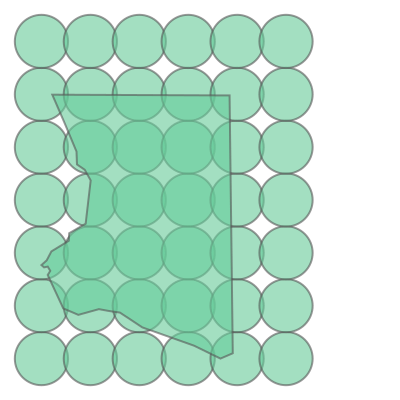

In [163]:
filler = PolygonFiller(polygon, radius)
circle_coords_list = filler.initialize_circles()
circles = [Point([i, j]).buffer(radius) for i, j in circle_coords_list]
GeometryCollection([*circles, polygon])

# Bee Grid Initialization

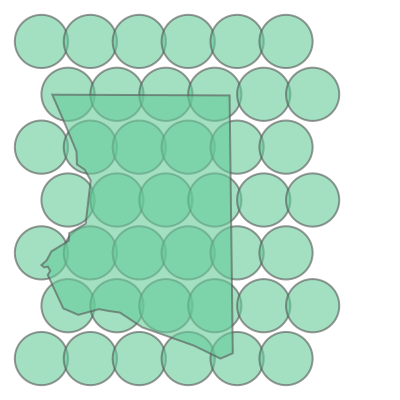

In [164]:
filler = PolygonFillerBeeInitialization(polygon, radius)
circle_coords_list = filler.initialize_circles()
circles = [Point([i, j]).buffer(radius) for i, j in circle_coords_list]
GeometryCollection([*circles, polygon])

# Pieces selection

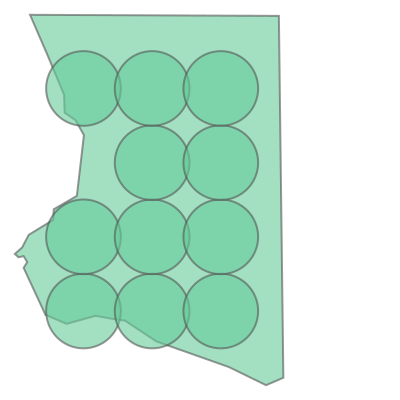

In [165]:
filler = PolygonFiller(polygon, radius)
circle_coords_list = filler.initialize_circles()
selected_circles = filler.select_circles(circle_coords_list)
circles = [Point([i, j]).buffer(radius) for i, j in selected_circles]
GeometryCollection([polygon, *circles])

# Optimization

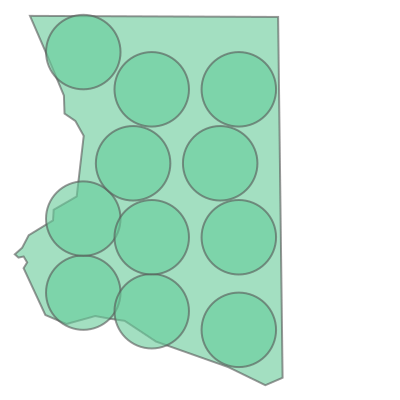

In [166]:
filler = PolygonFiller(polygon, radius)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
GeometryCollection([polygon, *circles])

# Irregular Packing Initialization

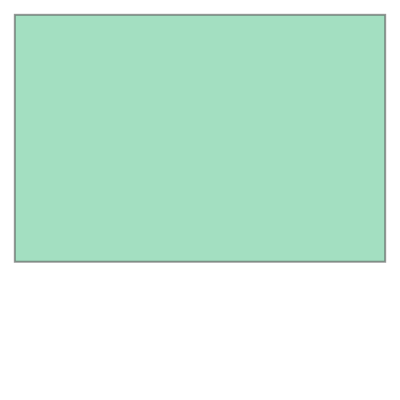

In [167]:
container = box(-2, -2, 4, 2)
container

In [168]:
with open('../shapes/random_polygons.json', 'r') as f:
    shapes = json.load(f)
    shapes = [shape(s) for s in shapes]

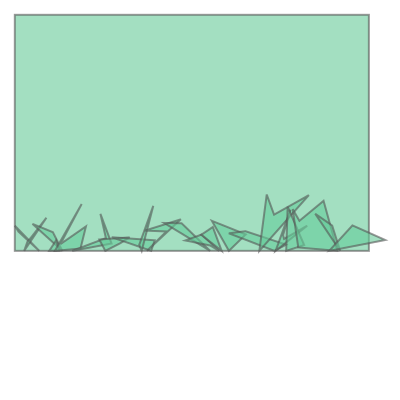

In [169]:
GeometryCollection([container, *shapes[:21]])

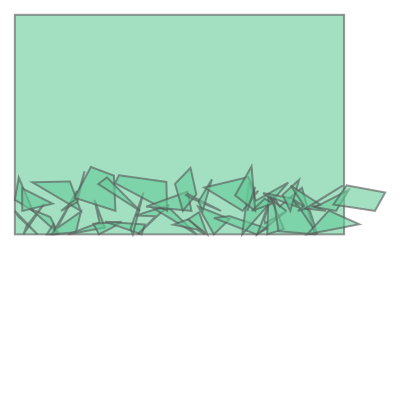

In [170]:
GeometryCollection([container, *shapes[:42]])

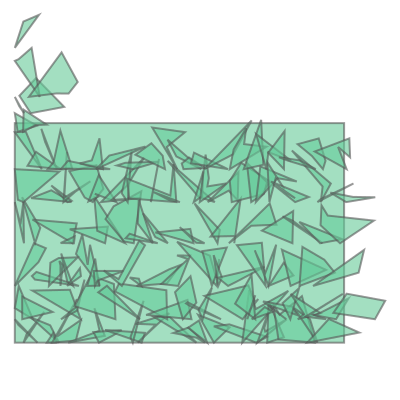

In [171]:
GeometryCollection([container, *shapes[:-15]])

# Relaxed Circles Score

In [172]:
radius = 0.5

Number of circles: 31 - Score: 0.917


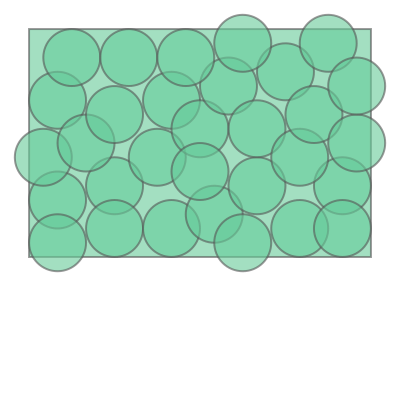

In [173]:
filler = PolygonFiller(container, radius, intersection_threshold=40, shots=5)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
print('Number of circles:', len(df), '- Score:', round(filler.score(), 3))
GeometryCollection([container, *circles])

Number of circles: 17 - Score: 0.799


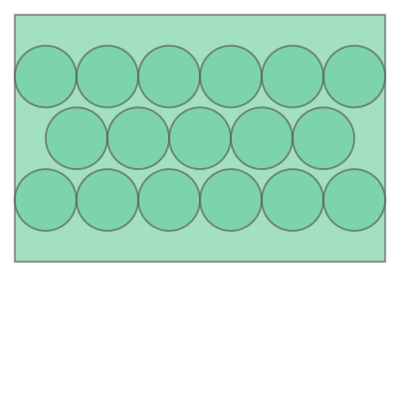

In [174]:
filler = PolygonFillerBeeInitialization(container, radius)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
print('Number of circles:', len(df), '- Score:', round(filler.score(), 3))
GeometryCollection([container, *circles])

Number of circles: 15 - Score: 0.822


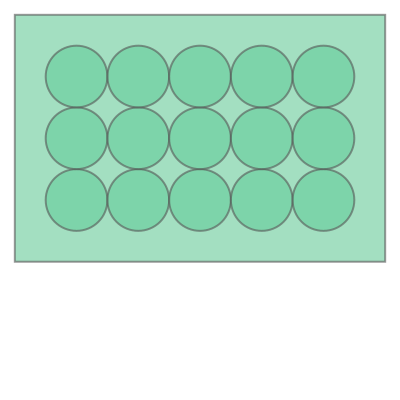

In [175]:
filler = PolygonFiller(container, radius)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
print('Number of circles:', len(df), '- Score:', round(filler.score(), 3))
GeometryCollection([container, *circles])

# Relaxed Irregular Score

In [176]:
with open('../shapes/random_polygons.json', 'r') as f:
    shapes = json.load(f)
    shapes = [shape(s) for s in shapes]

Number of pieces: 124 - Score: 0.487


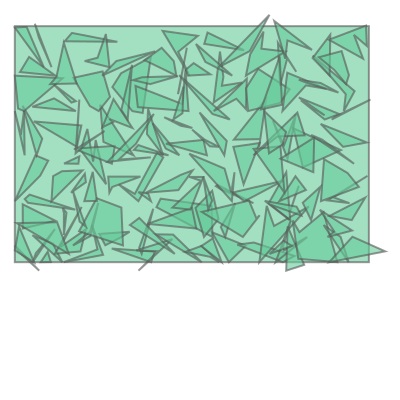

In [177]:
packer = IrregularPacker(container, shapes, n_rotations=1)
df = packer.pack()
print('Number of pieces:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

Number of pieces: 59 - Score: 0.165


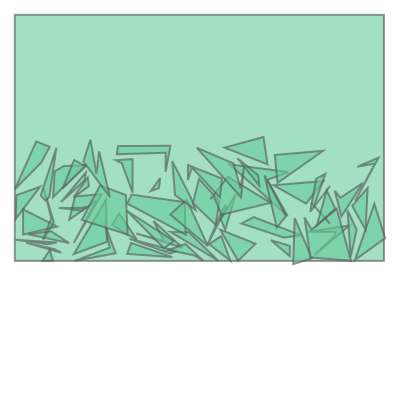

In [178]:
packer = IrregularPacker(container, shapes[:60])
df = packer.pack()
print('Number of pieces:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

# Strict Circles Score

Number of circles: 21 - Score: 0.313


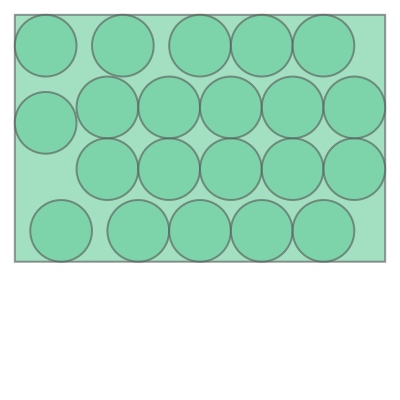

In [179]:
filler = PolygonFillerBeeStrict(container, radius, intersection_threshold=40)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
print('Number of circles:', len(df), '- Score:', round(filler.score(), 3))
GeometryCollection([container, *circles])

Number of circles: 18 - Score: 0.411


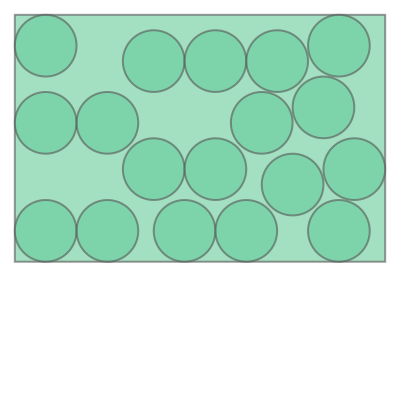

In [180]:
filler = PolygonFillerStrict(container, radius, intersection_threshold=40)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
print('Number of circles:', len(df), '- Score:', round(filler.score(), 3))
GeometryCollection([container, *circles])

# Strict Irregular Score

Number of included items: 56 - Score: 1.288


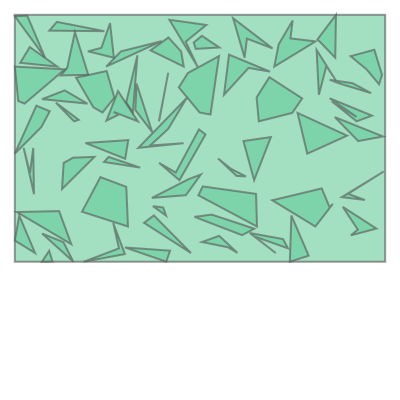

In [181]:
packer = IrregularPackerStrict(container, shapes, n_rotations=1)
df = packer.pack()
print('Number of included items:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

Number of included items: 69 - Score: 1.225


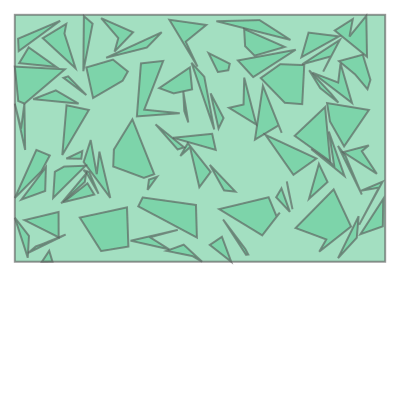

In [182]:
packer = IrregularPackerStrict(container, shapes)
df = packer.pack()
print('Number of included items:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

Number of included items: 89 - Score: 1.174


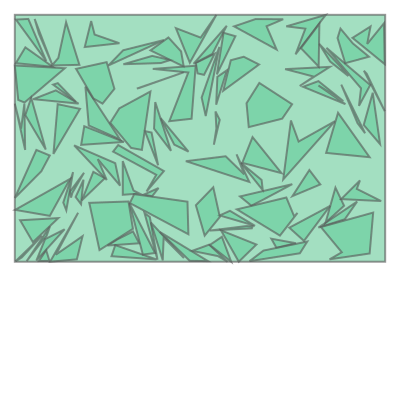

In [183]:
packer = IrregularPackerStrict(container, shapes, n_neighbors=10, step_portion=16, queue_length=20)
df = packer.pack()
print('Number of included items:', len(df), '- Score:', round(packer.score(), 3))
GeometryCollection([container, *df['item']])

# Circle Packing - Random Container

In [184]:
while True:
    container = Polygon(np.random.uniform(-2, 2, (np.random.randint(6, 10), 2)))
    if container.is_valid:
        break

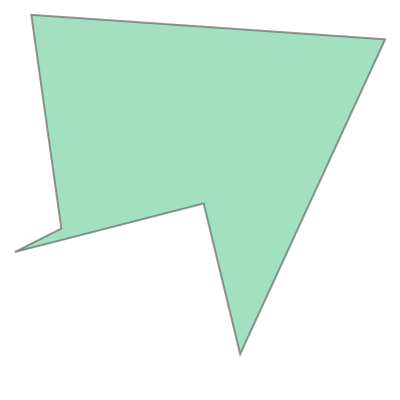

In [185]:
container

In [186]:
radius = 0.1

Number of circles: 126 - Score: 0.689


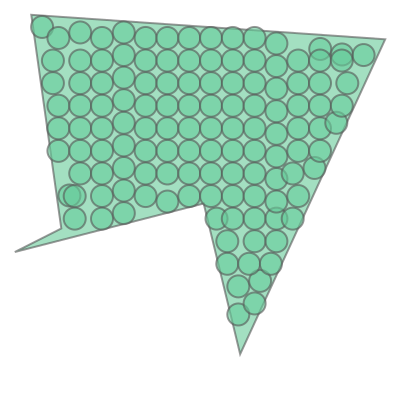

In [187]:
filler = PolygonFiller(container, radius)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
print('Number of circles:', len(df), '- Score:', round(filler.score(), 3))
GeometryCollection([container, *circles])

Number of circles: 104 - Score: 0.387


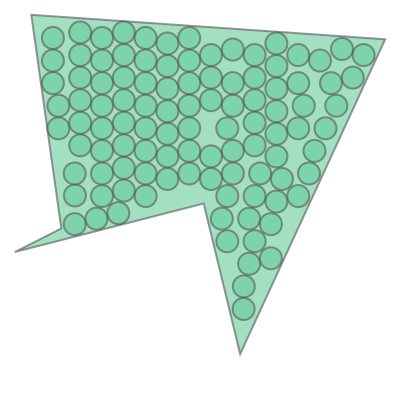

In [188]:
filler = PolygonFillerStrict(container, radius)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
print('Number of circles:', len(df), '- Score:', round(filler.score(), 3))
GeometryCollection([container, *circles])

Number of circles: 89 - Score: 0.476


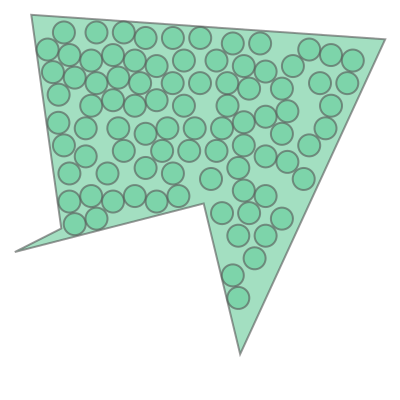

In [189]:
filler = PolygonFillerBeeStrict(container, radius)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
print('Number of circles:', len(df), '- Score:', round(filler.score(), 3))
GeometryCollection([container, *circles])

Number of circles: 89 - Score: 0.476


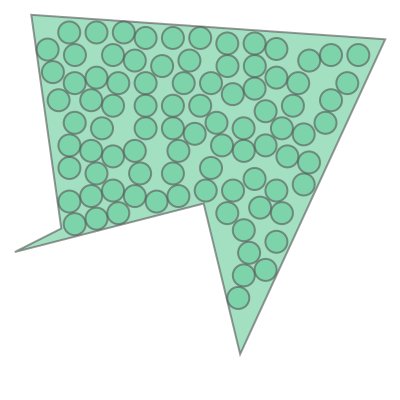

In [190]:
filler = PolygonFillerBeeStrict(container, radius, shots=5, n_neighbors=10)
df = filler.fill()
x = df['x'].values
y = df['y'].values
circles = [Point([i, j]).buffer(radius) for i, j in zip(x, y)]
print('Number of circles:', len(df), '- Score:', round(filler.score(), 3))
GeometryCollection([container, *circles])

# Computation Time vs Quality

In [153]:
container = box(-2, -2, 4, 2)

In [154]:
with open('../shapes/random_polygons.json', 'r') as f:
    shapes = json.load(f)
    shapes = [shape(s) for s in shapes]

In [155]:
packers = [
    IrregularPackerStrict(container, shapes, n_rotations=1),
    IrregularPackerStrict(container, shapes, n_neighbors=10, n_rotations=1),
    IrregularPackerStrict(container, shapes, step_portion=4, n_rotations=1),
    IrregularPackerStrict(container, shapes, step_portion=8, n_rotations=1),
    IrregularPackerStrict(container, shapes, step_portion=8, queue_length=10, n_rotations=1),
    IrregularPackerStrict(container, shapes),
    IrregularPackerStrict(container, shapes, step_portion=8, queue_length=10),
    IrregularPackerStrict(container, shapes, n_neighbors=10, step_portion=8, queue_length=10),
    IrregularPackerStrict(container, shapes, n_neighbors=10, step_portion=16, queue_length=20),
]

In [156]:
times = []
scores = []
for packer in packers:
    t0 = perf_counter()
    packer.pack()
    t1 = perf_counter()
    times.append(t1 - t0)
    scores.append(packer.score())

In [158]:
fig = px.scatter(x=times, y=scores)
fig.update_layout(xaxis_title='time').update_layout(yaxis_title='score')